# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification 

2. **Gambaran Umum**:  
   Dataset ini merupakan dataset Predictive Maintenance (Pemeliharaan Prediktif) yang berisi data sensor dan informasi operasional dari mesin industri. Dataset ini dirancang untuk memprediksi kegagalan mesin dan mengidentifikasi jenis kegagalan yang mungkin terjadi. 
3. **Karakteristik Dataset**:

   Jumlah Data
      50.000 baris data pengamatan
      10 kolom variabel/fitur

   Variabel dalam Dataset
      1. UDI (Unique Device Identifier): ID unik untuk setiap pengamatan (1-50000)

      2. Product ID: Identifikasi produk dengan format kombinasi huruf (L/M/H) dan angka
         - L: Low quality (Kualitas rendah)
         - M: Medium quality (Kualitas sedang)
         - H: High quality (Kualitas tinggi)
      
      3. Type: Kategori kualitas produk (L, M, atau H)

      4. Air temperature [K]: Suhu udara dalam Kelvin (berkisar 295-305K)

      5. Process temperature [K]: Suhu proses dalam Kelvin (berkisar 305-314K)

      6. Rotational speed [rpm]: Kecepatan rotasi mesin dalam RPM (1168-2886 rpm)

      7. Torque [Nm]: Torsi mesin dalam Newton-meter (3.8-76.6 Nm)

      8. Tool wear [min]: Tingkat keausan alat dalam menit (0-253 menit)

      9. Target: Variabel target biner (0: tidak gagal, 1: gagal)

      10. Failure Type: Jenis kegagalan spesifik, termasuk:
            - No Failure (Tidak ada kegagalan)
            - Heat Dissipation Failure (Kegagalan disipasi panas)
            - Power Failure (Kegagalan daya)
            - Overstrain Failure (Kegagalan karena beban berlebih)
            - Tool Wear Failure (Kegagalan karena keausan alat)
            - Random Failures (Kegagalan acak)



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pandas as pd

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [14]:
df = pd.read_csv('D:\Eksperimen_SML_Zayga\predictive_maintenance.raw')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_28440\2009363338.py:1: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv('D:\Eksperimen_SML_Zayga\predictive_maintenance.raw')


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [16]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

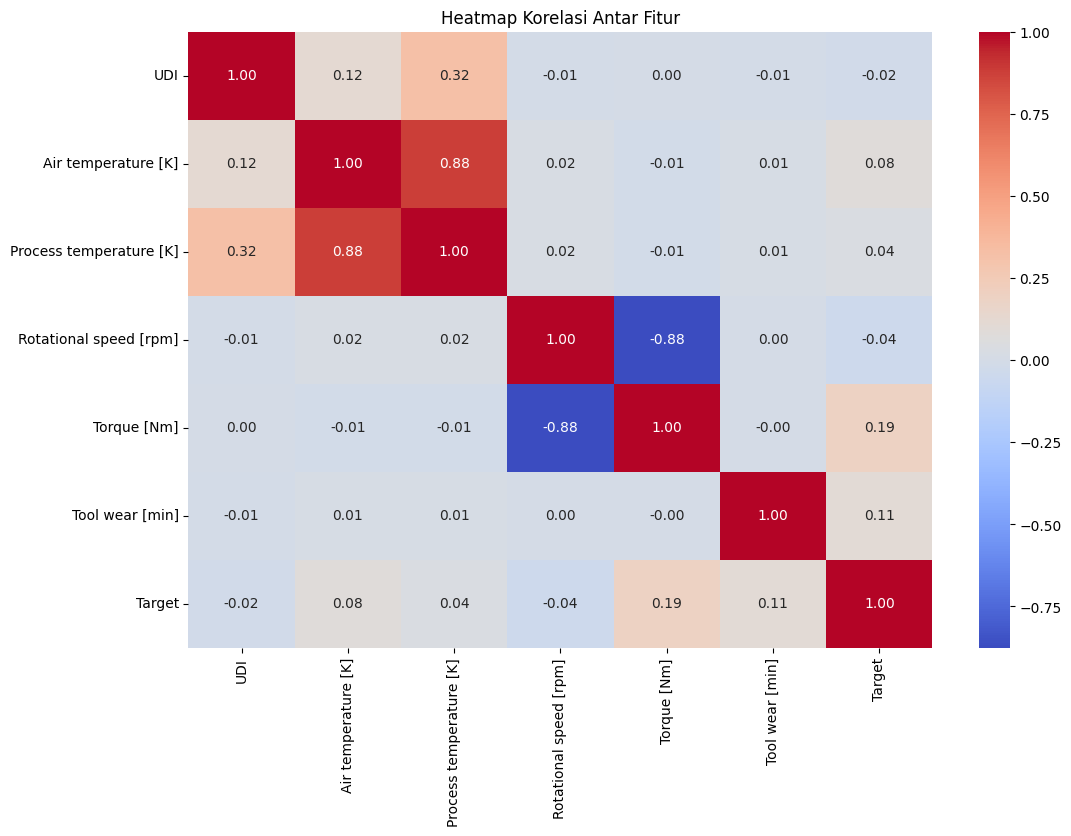

In [19]:
# Melihat korelasi antar fitur
corr_matrix = df.corr(numeric_only=True)

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

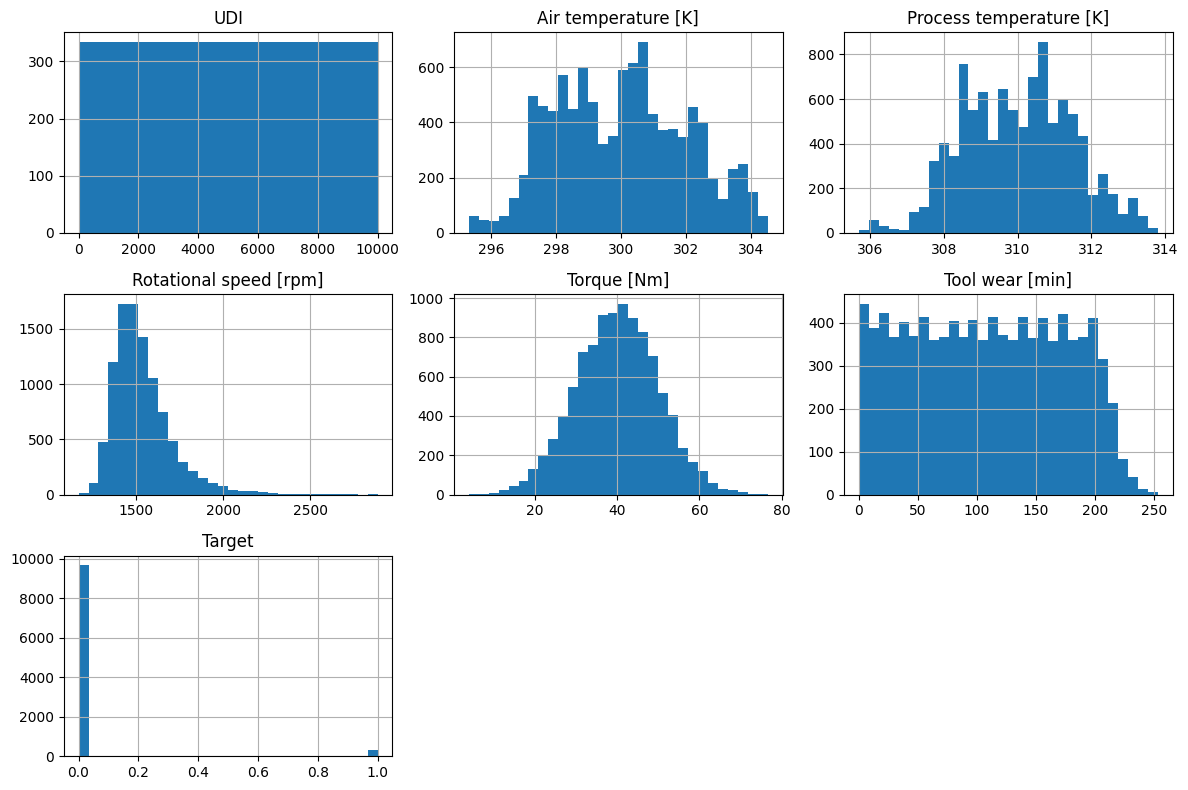

In [20]:
df.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

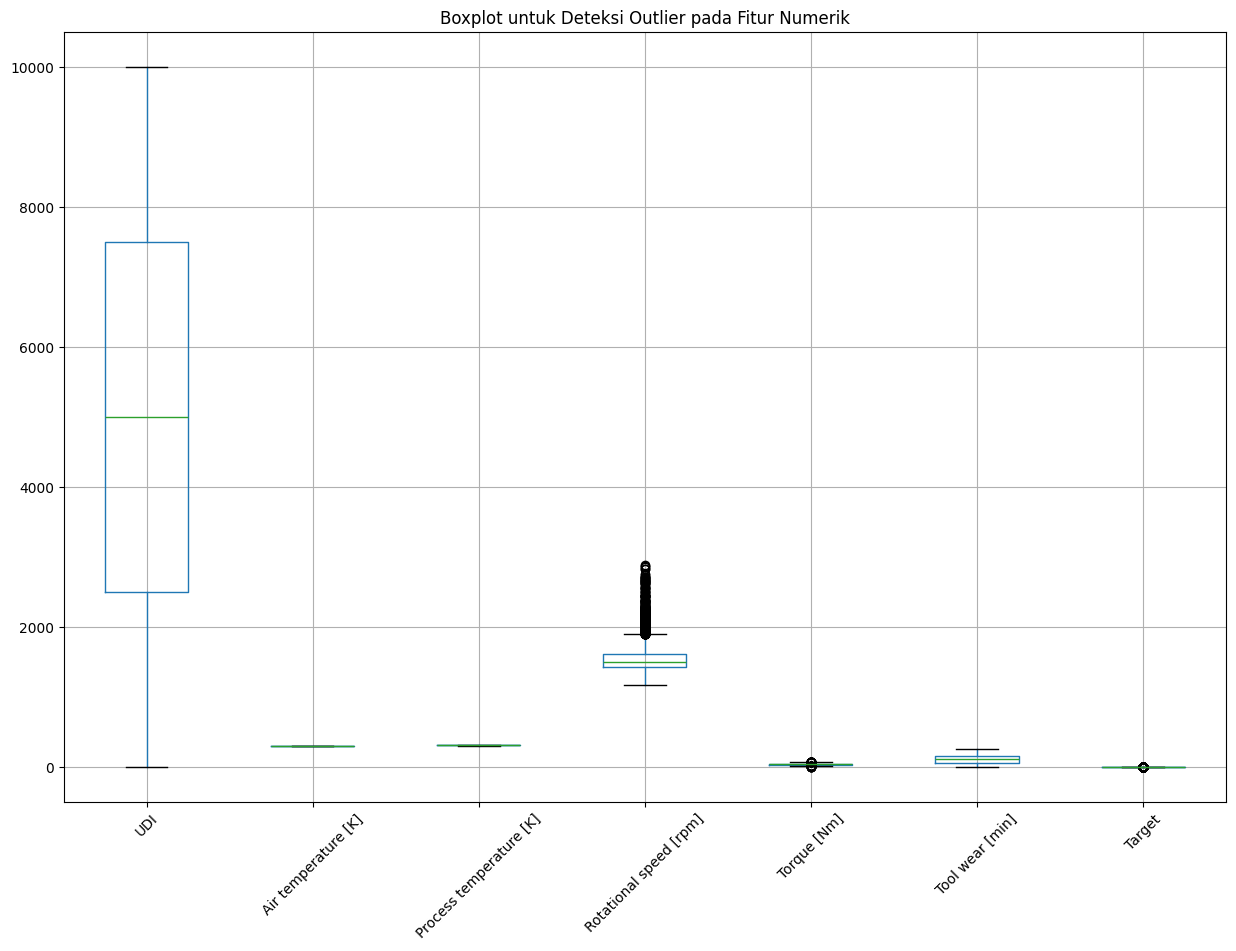

In [21]:
plt.figure(figsize=(15, 10))
df.select_dtypes(include=np.number).boxplot()
plt.title('Boxplot untuk Deteksi Outlier pada Fitur Numerik')
plt.xticks(rotation=45)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## **5.1. Cek Kolom Kategorikal**

In [22]:
# Cek kolom kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns
print("Kolom kategorikal:", categorical_cols.tolist())
print("\nDistribusi nilai pada kolom kategorikal:")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

Kolom kategorikal: ['Product ID', 'Type', 'Failure Type']

Distribusi nilai pada kolom kategorikal:

Product ID:
Product ID
M14860    1
L47181    1
L47182    1
L47183    1
L47184    1
         ..
M24855    1
H39410    1
M24857    1
H39412    1
M24859    1
Name: count, Length: 10000, dtype: int64

Type:
Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

Failure Type:
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


## **5.2. Encoding Data Kategorikal**

In [25]:
from sklearn.preprocessing import LabelEncoder
# Membuat copy dataframe untuk preprocessing
df_processed = df.copy()

# Encoding kolom Type menggunakan Label Encoding
if 'Type' in df_processed.columns:
    le = LabelEncoder()
    df_processed['Type'] = le.fit_transform(df_processed['Type'])
    print("Encoding Type:")
    print(f"Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Hapus kolom yang tidak diperlukan (jika ada kolom ID atau Product ID)
columns_to_drop = ['UDI', 'Product ID'] if 'Product ID' in df_processed.columns else ['UDI']
if all(col in df_processed.columns for col in columns_to_drop):
    df_processed = df_processed.drop(columns=columns_to_drop)
    print(f"\nKolom yang dihapus: {columns_to_drop}")

print("\nDataset setelah encoding:")
df_processed.head()

Encoding Type:
Mapping: {'H': np.int64(0), 'L': np.int64(1), 'M': np.int64(2)}

Kolom yang dihapus: ['UDI', 'Product ID']

Dataset setelah encoding:


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,No Failure
1,1,298.2,308.7,1408,46.3,3,0,No Failure
2,1,298.1,308.5,1498,49.4,5,0,No Failure
3,1,298.2,308.6,1433,39.5,7,0,No Failure
4,1,298.2,308.7,1408,40.0,9,0,No Failure


## **5.3. Handling Outlier (Metode IQR)**

In [26]:
# Fungsi untuk mendeteksi dan menangani outlier menggunakan IQR
def handle_outliers_iqr(df, columns, method='cap'):
    """
    Menangani outlier menggunakan metode IQR
    method: 'cap' untuk capping, 'remove' untuk menghapus outlier
    """
    df_clean = df.copy()
    outlier_info = {}
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Hitung jumlah outlier
        outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
        outlier_info[col] = len(outliers)
        
        if method == 'cap':
            # Capping: ganti outlier dengan batas atas/bawah
            df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
        elif method == 'remove':
            # Hapus baris yang mengandung outlier
            df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean, outlier_info

# Pilih kolom numerik untuk handling outlier (kecuali Target)
numeric_cols = df_processed.select_dtypes(include=[np.number]).columns.tolist()
if 'Target' in numeric_cols:
    numeric_cols.remove('Target')

print(f"Jumlah data sebelum handling outlier: {len(df_processed)}")

# Handling outlier dengan metode capping
df_processed, outlier_counts = handle_outliers_iqr(df_processed, numeric_cols, method='cap')

print(f"Jumlah data setelah handling outlier: {len(df_processed)}")
print("\nJumlah outlier per kolom:")
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

Jumlah data sebelum handling outlier: 10000
Jumlah data setelah handling outlier: 10000

Jumlah outlier per kolom:
Type: 0 outliers
Air temperature [K]: 0 outliers
Process temperature [K]: 0 outliers
Rotational speed [rpm]: 418 outliers
Torque [Nm]: 69 outliers
Tool wear [min]: 0 outliers


## **5.4. Standarisasi Fitur Numerik**

In [27]:
# Pisahkan fitur (X) dan target (y)
X = df_processed.drop('Target', axis=1)
y = df_processed['Target']

print(f"Shape fitur (X): {X.shape}")
print(f"Shape target (y): {y.shape}")
print(f"\nDistribusi kelas target:")
print(y.value_counts())
print(f"\nPersentase kelas:")
print(y.value_counts(normalize=True) * 100)

Shape fitur (X): (10000, 7)
Shape target (y): (10000,)

Distribusi kelas target:
Target
0    9661
1     339
Name: count, dtype: int64

Persentase kelas:
Target
0    96.61
1     3.39
Name: proportion, dtype: float64


In [28]:
# Simpan hasil preprocessing ke file CSV
df_processed.to_csv('D:\\Eksperimen_SML_Zayga\\preprocessing\\predictive_maintenance_processed.csv', index=False)
print("Hasil preprocessing berhasil disimpan ke predictive_maintenance_processed.csv")

Hasil preprocessing berhasil disimpan ke predictive_maintenance_processed.csv
